# Import Libraries
we import the libraries that we are going to use in this

In [ ]:
import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.optimizers import SGD
from keras.losses import SparseCategoricalCrossentropy, MeanSquaredError
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.utils import to_categorical

We download the Mnist dataset and put the data in train and test sets

In [ ]:
(images_train, label_train),(images_test,label_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We print the shape of the train and test

In [ ]:
#print shape of data
print(images_train.shape)
print(label_train.shape)
print(images_test.shape)
print(label_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


we show a sample image for each class of the dataset (Mnist has 10 classes, so 10 images is shown)

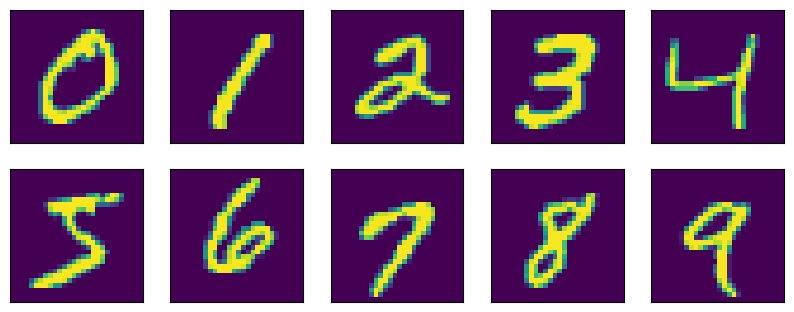

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))

samples_per_class = {}
for i in range(10):
    samples_per_class[i] = []

for i in range(len(images_train)):
    if len(samples_per_class[label_train[i]]) == 0:
        samples_per_class[label_train[i]] = images_train[i]
    if all(samples_per_class):
        break

j=0
for i in range(10):
  plt.subplot(5,5,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(samples_per_class[i])
  j=j+1
plt.show()

We plot the histogram of our dataset to show how many images each class has

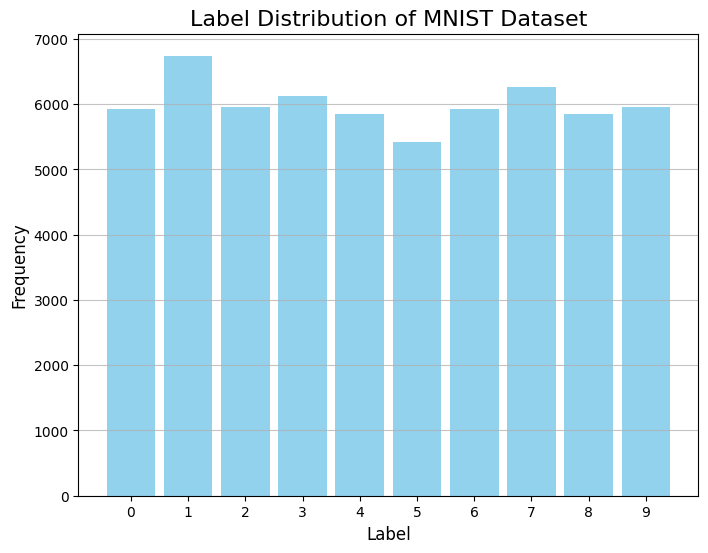

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(label_train, bins=np.arange(11) - 0.5 , color='skyblue', alpha=0.9, rwidth=0.85)
plt.title('Label Distribution of MNIST Dataset', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(np.arange(0, 10, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Preprocess
we normalize the data to get a better undrestanding of the data

min-max normalization is performed on the dataset, first the dataset is flattend using reshape. After that normalization is performed on the data by finding the min and max of the dataset.
At the end the images are reshaped into their normal shape.

This procedures are performed on train and test sets.

In [ ]:
# Reshape the data for normalization
images_train_reshaped = images_train.reshape(images_train.shape[0], -1)

# Perform min-max normalization
images_train_normalized = (images_train_reshaped - np.min(images_train_reshaped)) / (np.max(images_train_reshaped) - np.min(images_train_reshaped))

# Reshape the normalized data back to its original shape
images_train_normalized = images_train_normalized.reshape(images_train.shape)

In [ ]:
# Reshape the data for normalization
images_test_reshaped = images_test.reshape(images_test.shape[0], -1)

# Perform min-max normalization
images_test_normalized = (images_test_reshaped - np.min(images_test_reshaped)) / (np.max(images_test_reshaped) - np.min(images_test_reshaped))

# Reshape the normalized data back to its original shape
images_test_normalized = images_test_normalized.reshape(images_test.shape)

# Teacher model

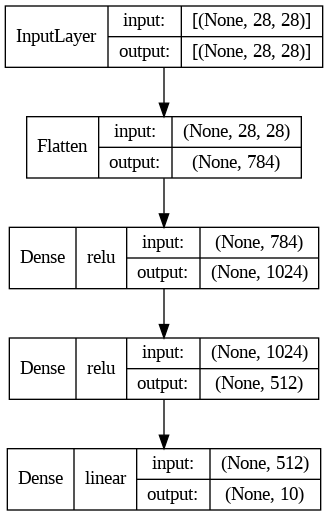

In [ ]:
Teacher = Sequential()
Teacher.add(Flatten(input_shape=(28, 28)))
Teacher.add(Dense(1024, activation='relu'))
Teacher.add(Dense(512, activation='relu'))
Teacher.add(Dense(10, activation='linear'))
plot_model(Teacher, to_file='model_plot.png', show_shapes=True, show_layer_names=False, show_layer_activations=True)

With the help of ModelCheckpoint we save the model with lowest validation loss

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_Teacher = ModelCheckpoint('Teacher_model.h5', save_best_only=True, monitor='val_loss', mode='min')

We choose SGD with learning rate of 0.01 as our optimizer and use cross entropy as our loss function. Considering the fact that in the Teacher model the output layer doesn't have any activation functions, from_logits is put as True in cross entropy. metrics is also set as accuracy so that the model will show the accuracy of each epoch.

In [ ]:
Teacher.compile(optimizer=SGD(learning_rate=0.01),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

We choose the validation set to be 20% of the train set. Also the number of epochs is put to 20 and the batch size of 32 is chosen.

In [ ]:
history_Teacher = Teacher.fit(images_train_normalized , label_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[checkpoint_Teacher], verbose = 1)

Epoch 1/20
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5939 - accuracy: 0.8542 - val_loss: 0.3008 - val_accuracy: 0.9158
Epoch 2/20
  59/1500 [>.............................] - ETA: 3s - loss: 0.3087 - accuracy: 0.9142

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 5s 4ms/step - loss: 0.2832 - accuracy: 0.9201 - val_loss: 0.2392 - val_accuracy: 0.9328
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2306 - accuracy: 0.9348 - val_loss: 0.2060 - val_accuracy: 0.9413
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1966 - accuracy: 0.9444 - val_loss: 0.1800 - val_accuracy: 0.9507
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1714 - accuracy: 0.9509 - val_loss: 0.1629 - val_accuracy: 0.9550
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1517 - accuracy: 0.9573 - val_loss: 0.1484 - val_accuracy: 0.9600
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1353 - accuracy: 0.9615 - val_loss: 0.1374 - val_accuracy: 0.9628
Epoch 8/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1222 - accuracy: 0.9661 - val_loss: 0.1289 - val_accuracy: 0.9641
Epo

We plot the training and validation loss of the Teacher model

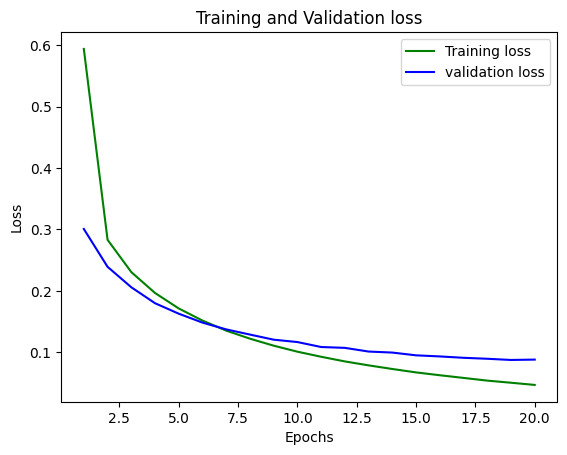

In [ ]:
# Plot Training and validation loss
loss_train = history_Teacher.history['loss']
loss_val = history_Teacher.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We plot the training and validation accuracy of the Teacher model

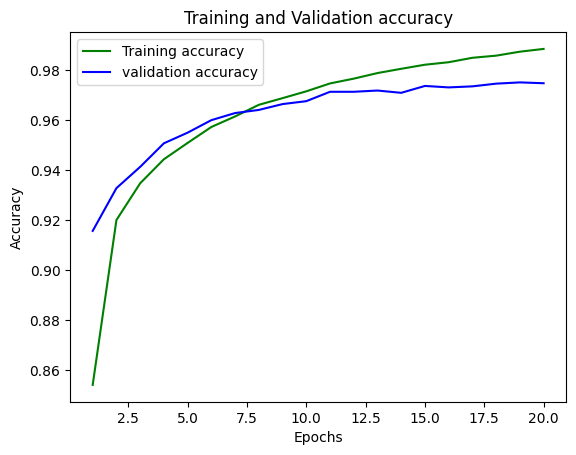

In [ ]:
# Plot Training and validation accuracy
acc_train = history_Teacher.history['accuracy']
acc_val = history_Teacher.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy and loss of the Teacher model is calculated using the test set.
The Teacher model used for evaluation is the best model saved during the training session. To calculate the loss and accuracy, evaluate is used. For the calculation of the number of misclassifications first the model is used to predict the labels of the test set. After that the labels predicted are compared to the real labels and the number of wrong ones is calculated. Using this method the misclassifications is obtained.

In [ ]:
best_Teacher = load_model('Teacher_model.h5')

loss, accuracy = best_Teacher.evaluate(images_test_normalized, label_test, verbose=2)
print('\nTesting loss: %.2f, accuracy: %.2f%%'%(loss, accuracy*100))

predicted_labels = np.argmax(best_Teacher.predict(images_test_normalized), axis=-1)
misclassifications = np.sum(predicted_labels != label_test)
print("Number of misclassifications:", misclassifications)

313/313 - 1s - loss: 0.0827 - accuracy: 0.9745 - 682ms/epoch - 2ms/step

Testing loss: 0.08, accuracy: 97.45%
313/313 [==============================] - 1s 2ms/step
Number of misclassifications: 255


The confusion Matrix of the Teacher model is ploted to show how the model performed on each class

313/313 [==============================] - 1s 2ms/step


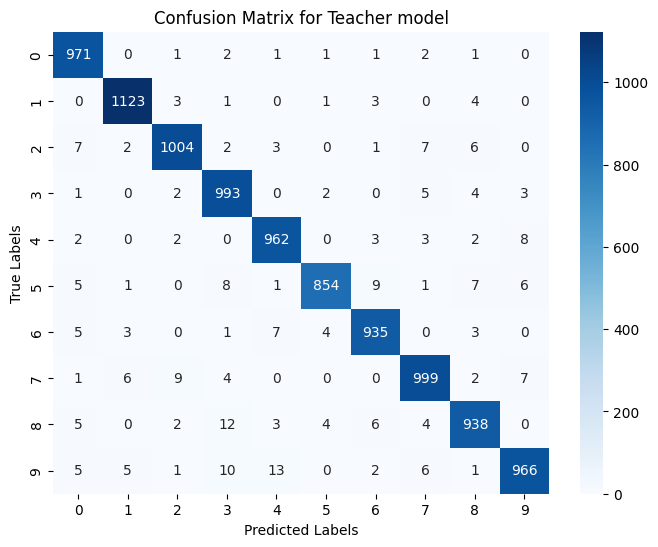

In [ ]:
y_pred=best_Teacher.predict(images_test_normalized)
y_pred=np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Teacher model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Student model

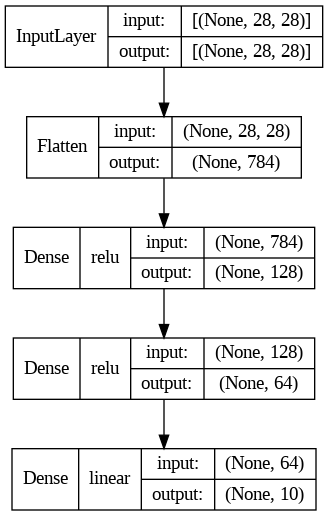

In [ ]:
Student = Sequential()
Student.add(Flatten(input_shape=(28, 28)))
Student.add(Dense(128, activation='relu'))
Student.add(Dense(64, activation='relu'))
Student.add(Dense(10, activation='linear'))
plot_model(Student, to_file='model_plot.png', show_shapes=True, show_layer_names=False, show_layer_activations=True)

With the help of ModelCheckpoint we save the model with lowest validation loss

In [ ]:
checkpoint_Student = ModelCheckpoint('Student_model.h5', save_best_only=True, monitor='val_loss', mode='min')

We choose SGD with learning rate of 0.01 as our optimizer and use cross entropy as our loss function. Considering the fact that in the Student model the output layer doesn't have any activation functions, from_logits is put as True in cross entropy. metrics is also set as accuracy so that the model will show the accuracy of each epoch.

In [ ]:
Student.compile(optimizer=SGD(learning_rate=0.01),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

We choose the validation set to be 20% of the train set. Also the number of epochs is put to 10 and the batch size of 32 is chosen.

In [ ]:
history_Student = Student.fit(images_train_normalized , label_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[checkpoint_Student], verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.7226 - accuracy: 0.8109 - val_loss: 0.3381 - val_accuracy: 0.9062
Epoch 2/10
  24/1500 [..............................] - ETA: 6s - loss: 0.3718 - accuracy: 0.8828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3153 - accuracy: 0.9106 - val_loss: 0.2709 - val_accuracy: 0.9227
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2592 - accuracy: 0.9255 - val_loss: 0.2293 - val_accuracy: 0.9344
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2247 - accuracy: 0.9348 - val_loss: 0.2058 - val_accuracy: 0.9425
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1994 - accuracy: 0.9418 - val_loss: 0.1882 - val_accuracy: 0.9485
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1787 - accuracy: 0.9479 - val_loss: 0.1764 - val_accuracy: 0.9503
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1616 - accuracy: 0.9530 - val_loss: 0.1614 - val_accuracy: 0.9525
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1470 - accuracy: 0.9570 - val_loss: 0.1490 - val_accuracy: 0.9589
Epo

We plot the training and validation loss of the Student model

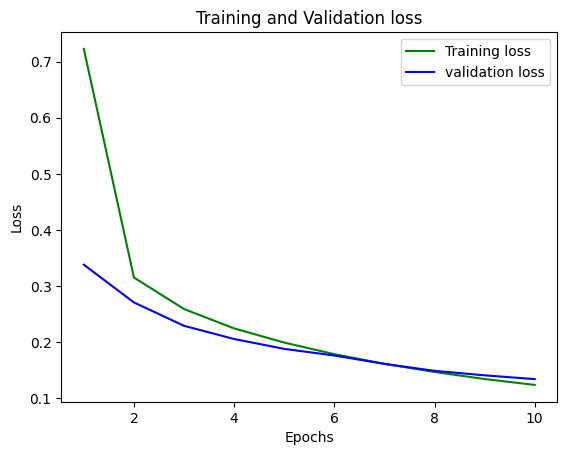

In [ ]:
# Plot Training and validation loss
loss_train = history_Student.history['loss']
loss_val = history_Student.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We plot the training and validation accuracy of the Student model

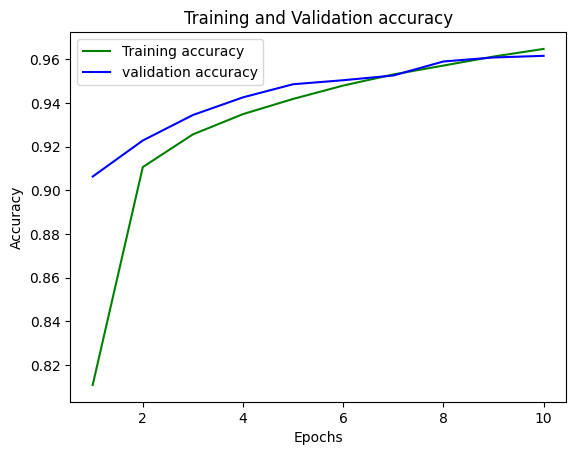

In [ ]:
# Plot Training and validation accuracy
acc_train = history_Student.history['accuracy']
acc_val = history_Student.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The accuracy and loss of the Student model is calculated using the test set.
The Student model used for evaluation is the best model saved during the training session. To calculate the loss and accuracy, evaluate is used. For the calculation of the number of misclassifications first the model is used to predict the labels of the test set. After that the labels predicted are compared to the real labels and the number of wrong ones is calculated. Using this method the misclassifications is obtained.

In [ ]:
best_Student = load_model('Student_model.h5')

loss, accuracy = best_Student.evaluate(images_test_normalized, label_test, verbose=2)
print('\nTesting loss: %.2f, accuracy: %.2f%%'%(loss, accuracy*100))

predicted_labels = np.argmax(best_Student.predict(images_test_normalized), axis=-1)
misclassifications = np.sum(predicted_labels != label_test)
print("Number of misclassifications:", misclassifications)

313/313 - 1s - loss: 0.1310 - accuracy: 0.9618 - 687ms/epoch - 2ms/step

Testing loss: 0.13, accuracy: 96.18%
313/313 [==============================] - 1s 2ms/step
Number of misclassifications: 382


The confusion Matrix of the Student model is ploted to show how the model performed on each class

313/313 [==============================] - 1s 2ms/step


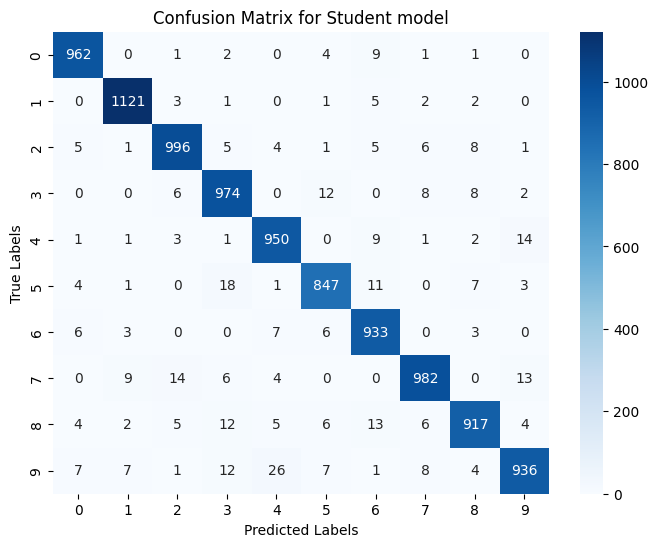

In [ ]:
y_pred=best_Student.predict(images_test_normalized)
y_pred=np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Student model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# knowledge distillation

Knowledge distillation is a technique used to transfer knowledge from a large, complex model (the teacher) to a smaller, more efficient model (the student).

For this model we pass in the logits of the Teacher model into the Student model and try to train the Student model with the logits of Teacher model rather than the labels of the dataset.

First we save the logits from the Teacher model. As we know the last layer in the Teacher model (output layer) didn't have any activation functions and was linear. With that in mind the output of the Teacher model is the logits needed for the Student model. So to obtain the logits of the Teacher model we use Teacher.predict and pass in the training set into it. The output of Teacher.predict is the logits that will be passed into Student model.


In [ ]:
Teacher_logits = Teacher.predict(images_train_normalized)

1875/1875 [==============================] - 3s 2ms/step


With the help of ModelCheckpoint we save the model with lowest validation loss

In [ ]:
checkpoint_Student_logit = ModelCheckpoint('Student_model_logit.h5', save_best_only=True, monitor='val_loss', mode='min')

We choose SGD with learning rate of 0.01 as our optimizer and use MSE (Mean Squared Error) as our loss function. metrics is also set as accuracy so that the model will show the accuracy of each epoch.

In [ ]:
Student.compile(optimizer=SGD(learning_rate=0.01),loss=MeanSquaredError(),metrics=['accuracy'])

We choose the validation set to be 20% of the train set. Also the number of epochs is put to 10 and the batch size of 32 is chosen.

In [ ]:
history_Student_logit = Student.fit(images_train_normalized ,Teacher_logits , validation_split=0.2, epochs=10, batch_size=32, callbacks=[checkpoint_Student_logit], verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7022 - accuracy: 0.9740 - val_loss: 0.3891 - val_accuracy: 0.9827
Epoch 2/10
  61/1500 [>.............................] - ETA: 3s - loss: 0.4199 - accuracy: 0.9790

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.9789 - val_loss: 0.2996 - val_accuracy: 0.9848
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2988 - accuracy: 0.9820 - val_loss: 0.2626 - val_accuracy: 0.9860
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9833 - val_loss: 0.2371 - val_accuracy: 0.9877
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2345 - accuracy: 0.9842 - val_loss: 0.2441 - val_accuracy: 0.9880
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2150 - accuracy: 0.9849 - val_loss: 0.2172 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2006 - accuracy: 0.9854 - val_loss: 0.2011 - val_accuracy: 0.9897
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9858 - val_loss: 0.1817 - val_accuracy: 0.9892
Epo

We plot the training and validation loss of the Knowledge distillation Student model

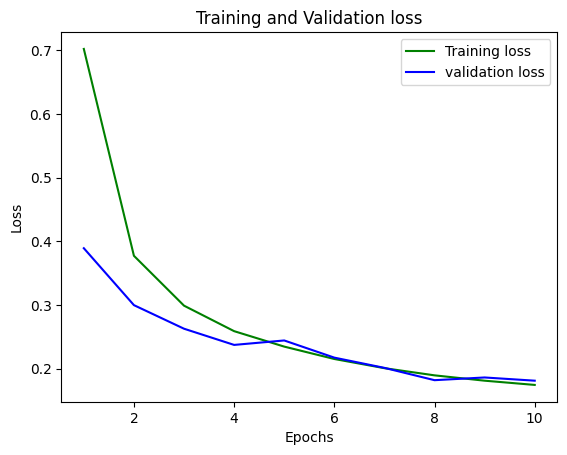

In [ ]:
# Plot Training and validation loss
loss_train = history_Student_logit.history['loss']
loss_val = history_Student_logit.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We plot the training and validation accuracy of the Knowledge distillation Student model

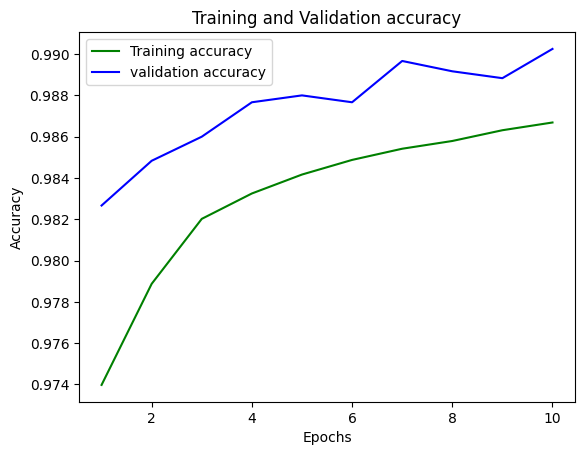

In [ ]:
# Plot Training and validation accuracy
acc_train = history_Student_logit.history['accuracy']
acc_val = history_Student_logit.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The loss, accuracy and number of misclassifications are calculated the same way as the two previuos models.

In [ ]:
best_Student_logit = load_model('Student_model_logit.h5')

loss, accuracy = best_Student_logit.evaluate(images_test_normalized, label_test, verbose=2)
print('\nTesting loss: %.2f, accuracy: %.2f%%'%(loss, accuracy*1000))

predicted_labels = np.argmax(best_Student_logit.predict(images_test_normalized), axis=-1)
misclassifications = np.sum(predicted_labels != label_test)
print("Number of misclassifications:", misclassifications)

313/313 - 1s - loss: 52.8989 - accuracy: 0.0987 - 681ms/epoch - 2ms/step

Testing loss: 52.90, accuracy: 98.70%
313/313 [==============================] - 1s 2ms/step
Number of misclassifications: 296


The confusion Matrix of the Knowledge distillation Student model is ploted to show how the model performed on each class

313/313 [==============================] - 1s 2ms/step


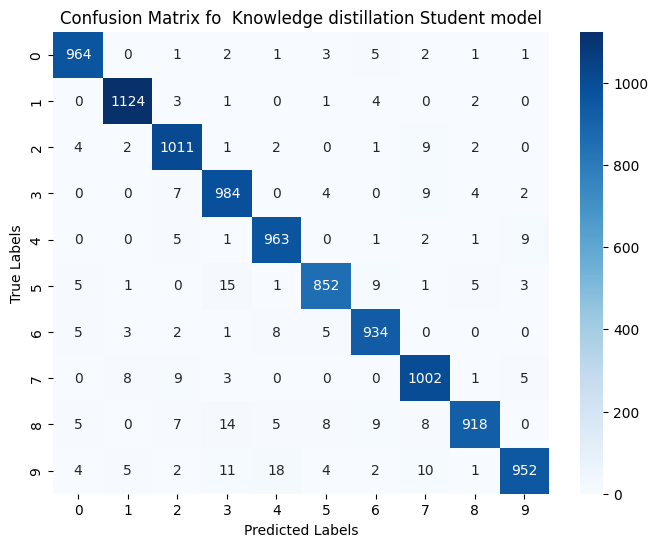

In [ ]:
y_pred=best_Student_logit.predict(images_test_normalized)
y_pred=np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix fo  Knowledge distillation Student model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

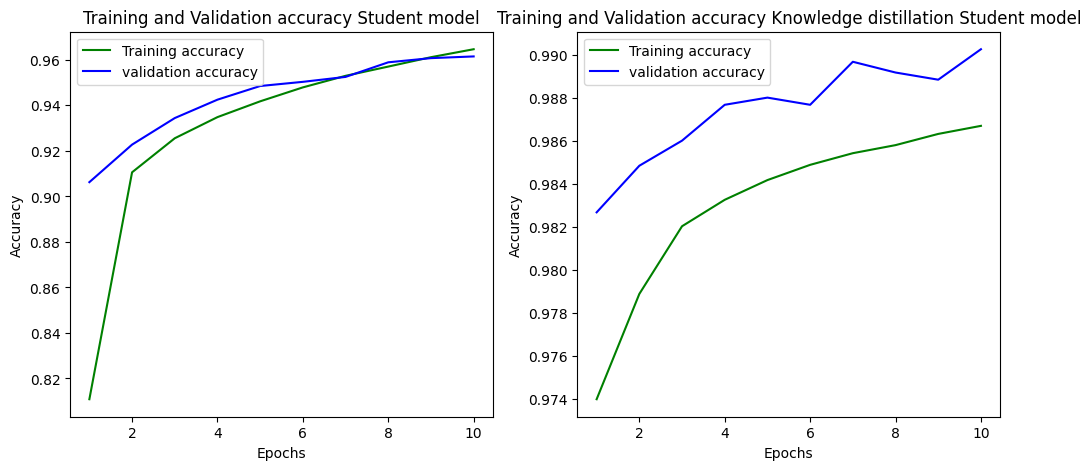

In [ ]:
plt.figure(figsize=(12, 5))

acc_train = history_Student.history['accuracy']
acc_val = history_Student.history['val_accuracy']
epochs = range(1,11)
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy Student model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
acc_train_logit = history_Student_logit.history['accuracy']
acc_val_logit = history_Student_logit.history['val_accuracy']
epochs_logit = range(1,11)
plt.plot(epochs_logit, acc_train_logit, 'g', label='Training accuracy')
plt.plot(epochs_logit, acc_val_logit, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy Knowledge distillation Student model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()